In [2]:
import pandas as pd #Manipulación de datos
import os #Manejo de Archivos Drive

In [3]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-names.txt',
 'bank.csv',
 'bank-full.csv',
 'bank-full.xlsx',
 'bank-full-trad.xlsx',
 'bank-full-trad-num.xlsx',
 '~$bank-full.xlsx']

In [4]:
archivo = f'{dir}bank-full.xlsx'
data_xls = pd.read_excel(archivo, sheet_name='bank-full')

In [5]:
data_xls.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# ARBOL DE DECISION DIRECTO

In [24]:
df = pd.get_dummies(data = data_xls, drop_first=True)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,True,False,False,False,True,False,True
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,True,False


## 2. Seleccionamos las variables

In [25]:
covariables = df.drop(columns=['y_yes'])
objetivo = df['y_yes']

## 3. Entrenamiento del Árbol de decisión

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier(max_depth=4)

In [28]:
model.fit(X=covariables, y=objetivo)

DecisionTreeClassifier(max_depth=4)

## 4. Visualizar Módelo

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

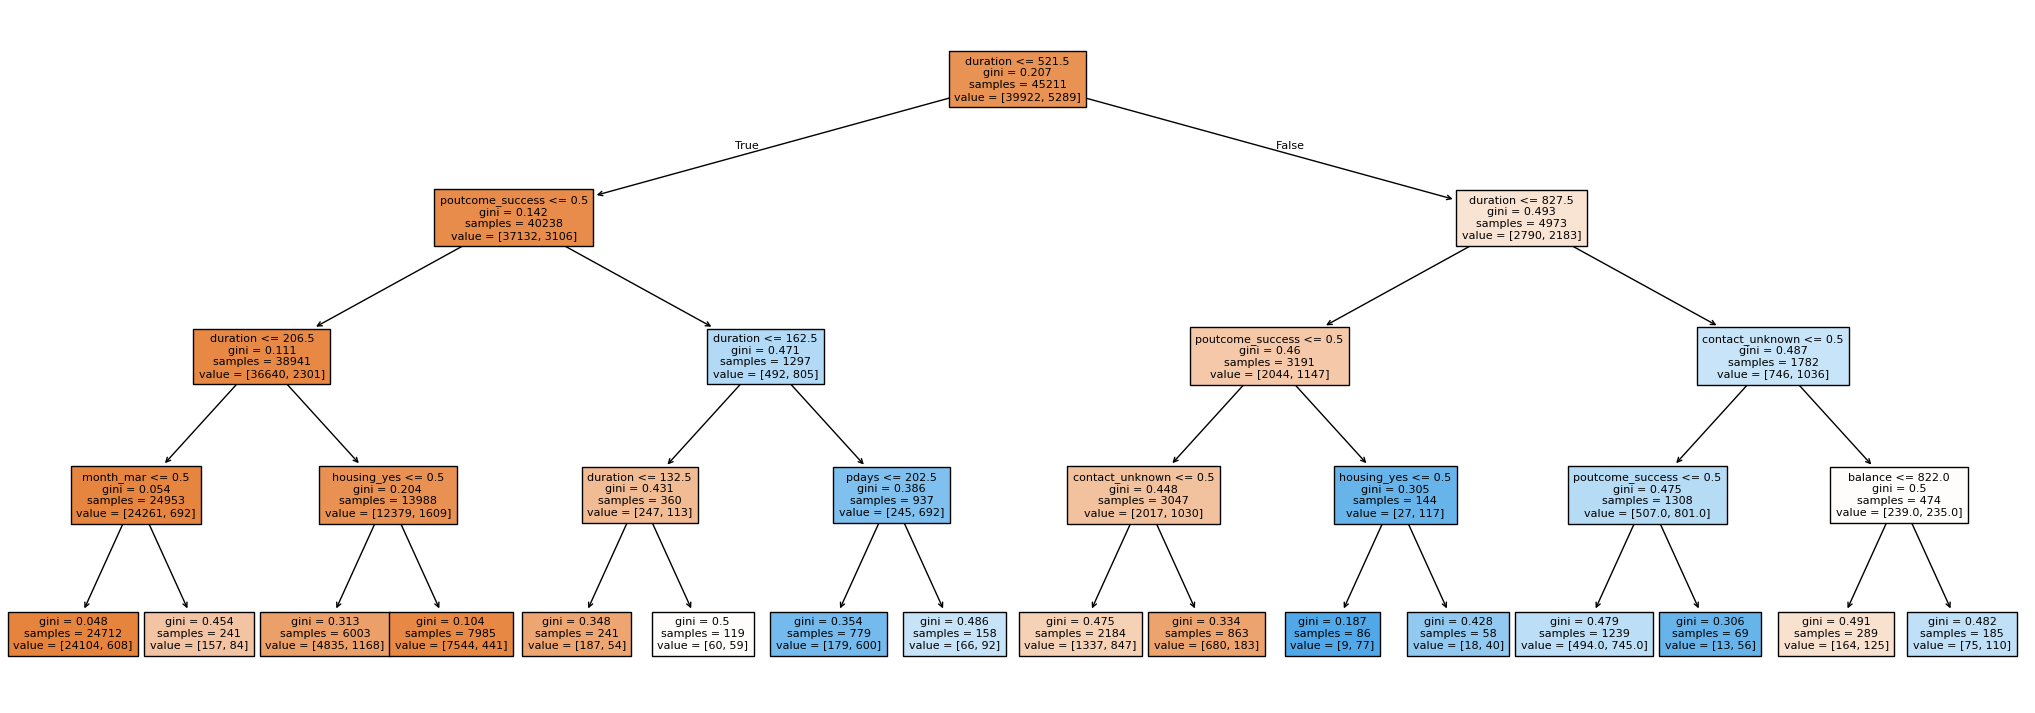

In [30]:
plt.figure(figsize=(26, 9))
plot_tree(decision_tree=model, feature_names=covariables.columns, filled=True, fontsize=8);

 ## 5. Evaluacion de prediccion

In [31]:
y_pred = model.predict(covariables)
df['y_pred'] = y_pred

In [32]:
df.sample(10)[['y_yes','y_pred']]

,y_yes,y_pred
28014,False,False
29244,True,True
27687,False,False
6703,False,False
34048,False,False
40582,False,False
5619,False,False
12565,False,False
44430,True,False
856,False,False


In [33]:
(df['y_yes'] == df['y_pred']).mean()

0.9021698259273185

In [34]:
len(df[ df['y_yes']!= df['y_pred'] ]) ## en 4423 datos falla el algoitmo

4423

## PONER A PRUEBA CON NUEVOS DATOS

In [47]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank/'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-names.txt',
 'bank.csv',
 'bank-full.csv',
 'bank-full.xlsx',
 'bank-full-trad.xlsx',
 'bank-full-trad-num.xlsx',
 '~$bank-full.xlsx']

In [48]:
archivo = f'{dir}bank.csv'
data_adic = pd.read_csv(archivo, sep=';')

In [50]:
print(data_adic.head())
print(len(data_adic))

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
4521


> Generacion de `dummies`para los adicionales

In [51]:
df_adi = pd.get_dummies(data = data_adic, drop_first=True)
df_adi

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4517,57,-3313,9,153,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4518,57,295,19,151,11,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4519,28,1137,6,129,4,211,3,True,False,False,...,False,False,False,False,False,False,True,False,False,False


> Dividimos las `covariables` y `objetivo`

In [52]:
covar_adic = df_adi.drop(columns=['y_yes'])
obj_adic = df_adi['y_yes']

In [53]:
y_pred = model.predict(covar_adic) ## Se usa el modelo anterior para predecir los datos nuevos
df_adi['y_pred'] = y_pred

In [57]:
precision = (df_adi['y_yes'] == df_adi['y_pred']).mean()
num_errores = len(df_adi[ df_adi['y_yes']!= df_adi['y_pred'] ])
print(f'La precisión del modelo es: {precision}')
print(f'El número de errores es: {num_errores}')

La precisión del modelo es: 0.9017916390179164
El número de errores es: 444


# GENERACION DE DATOS SINTETICOS CON `SMOTE`

In [7]:
data_xls.head()
# Copiar el dataframe
dfsmote = data_xls.copy()
dfsmote


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
print( 'Job: ',  dfsmote['job'].unique())
print( 'Marital: ', dfsmote['marital'].unique())
print( 'Education: ' , dfsmote['education'].unique())
print( 'Default: ' , dfsmote['default'].unique())
print( 'Housing: ' , dfsmote['housing'].unique())
print( 'Loan: ' , dfsmote['loan'].unique())
print( 'Contact: ' , dfsmote['contact'].unique())
print( 'Month: ' , dfsmote['month'].unique())
print( 'PoutCome: ' , dfsmote['poutcome'].unique())

Job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:  ['married' 'single' 'divorced']
Education:  ['tertiary' 'secondary' 'unknown' 'primary']
Default:  ['no' 'yes']
Housing:  ['yes' 'no']
Loan:  ['no' 'yes']
Contact:  ['unknown' 'cellular' 'telephone']
Month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
PoutCome:  ['unknown' 'failure' 'other' 'success']


In [9]:
dfsmote['y'] = [ 0 if x == 'no' else 1 for x in dfsmote['y'] ]
dfsmote['default'] = [ 0 if x == 'no' else 1 for x in dfsmote['default'] ]
dfsmote['housing'] = [ 0 if x == 'no' else 1 for x in dfsmote['housing'] ]
dfsmote['loan'] = [ 0 if x == 'no' else 1 for x in dfsmote['loan'] ]
dfsmote.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
columnasParaDummies = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
dummies = pd.get_dummies(dfsmote[columnasParaDummies])

In [11]:
columnaImprimir = 'contact'
# Filtrar las columnas que empiezan con una columna específica
columnas_job = [col for col in dummies.columns if col.startswith(columnaImprimir)]

# Imprimir las columnas filtradas
print("Columnas que empiezan con 'job':", columnas_job)

# Mostrar las primeras filas de las columnas filtradas
print(dummies[columnas_job].head())

Columnas que empiezan con 'job': ['contact_cellular', 'contact_telephone', 'contact_unknown']
   contact_cellular  contact_telephone  contact_unknown
0             False              False             True
1             False              False             True
2             False              False             True
3             False              False             True
4             False              False             True


In [12]:
# Eliminamos las columnas que no necesitamos
dfsmote = dfsmote.drop(columns=columnasParaDummies)

In [13]:
# Fusionamos el dataframe original con las columnas dummies
dfsmote = pd.concat([dfsmote, dummies], axis=1)
dfsmote.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


#### Escalamos los rangos

Cuando utilizas SMOTE (Synthetic Minority Over-sampling Technique) para balancear clases en un conjunto de datos desbalanceado, es una buena práctica escalar nuestros datos antes de aplicar SMOTE. La razón principal para esto es que SMOTE genera ejemplos sintéticos al interpolar entre ejemplos existentes, y las características deben estar en la misma escala para que estas interpolaciones sean efectivas.

Usaremos MinMaxScaler de scikit-learn para escalar columnas que tengan valores superiores a 1 en el rango [0, 1]. Aqui cómo:

Para normalizar un valor $X$ al rango $[0, 1]$, utilizamos la fórmula:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

donde:
- $X$ es el valor original.
- $X_{\text{min}}$ es el valor mínimo en el rango original.
- $X_{\text{max}}$ es el valor máximo en el rango original.
- $X_{\text{norm}}$ es el valor normalizado.


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Scale only columns that have values greater than 1
to_scale = [col for col in dfsmote.columns if dfsmote[col].max() > 1] # Selecciona las columnas que tienen valores mayores a 1

mms = MinMaxScaler() # Se crea el objeto MinMaxScaler
dfsmote[to_scale] = mms.fit_transform(dfsmote[to_scale]) # Se escalan las columnas seleccionadas
dfsmote

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0,0.092259,1,0,0.133333,0.053070,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
1,0.337662,0,0.073067,1,0,0.133333,0.030704,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
2,0.194805,0,0.072822,1,1,0.133333,0.015453,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
3,0.376623,0,0.086476,1,0,0.133333,0.018707,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
4,0.194805,0,0.072812,0,0,0.133333,0.040260,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0,0.080293,0,0,0.533333,0.198658,0.032258,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
45207,0.688312,0,0.088501,0,0,0.533333,0.092721,0.016129,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
45208,0.701299,0,0.124689,0,0,0.533333,0.229158,0.064516,0.212156,0.010909,...,False,False,False,True,False,False,False,False,True,False
45209,0.506494,0,0.078868,0,0,0.533333,0.103294,0.048387,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True


Ahora ya tenemos nuestros valores escalados

### APLICACION DE SMOTE

In [91]:
# Separamos covariables de variable objetivo
covariables = dfsmote.drop(columns=['y'])
objetivo = dfsmote['y']

In [92]:
objetivo.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [93]:
covariables.value_counts()

age       default  balance   housing  loan  day       duration  campaign  pdays     previous  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  education_primary  education_secondary  education_tertiary  education_unknown  contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown
0.000000  0        0.072831  0        0     0.800000  0.026434  0.016129  0.000000  0.000000  False       False            False             False          False           False        False              False         True         False           False           False        False             False            True            False       

In [19]:
# pip install imbalanced-learn

In [98]:
from imblearn.over_sampling import SMOTE

# sm = SMOTE(sampling_strategy='minority')
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(covariables, objetivo)

print(f'''Shape of X before SMOTE: {covariables.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (45211, 48)
Shape of X after SMOTE: (79844, 48)

Balance of positive and negative classes (%):


y
0    50.0
1    50.0
Name: proportion, dtype: float64

In [97]:
y_sm.value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

### ENTRENAMIENTO `RANDOM FOREST`

Division de datos

In [80]:
dfsmote['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
import numpy as np

In [85]:
X = dfsmote.drop('y', axis=1)
y = dfsmote['y' ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Cantidad de respuestas positivas para Y en Train y Test
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 11.61
% Positive class in Test = 11.97


Entreamiento del modelo

Accuracy = 0.90
Recall = 0.39



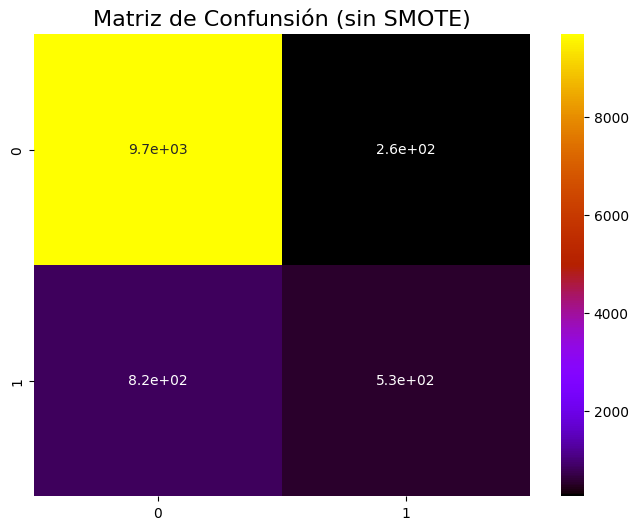

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds) :.2f}\nRecall = {recall_score(y_test, preds) :.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confunsión (sin SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap="gnuplot");

Un `recall` de 0.39 significa que el modelo identificó correctamente el 39% de las instancias positivas reales. Es decir, que se equivoco en el 61% de los falsos positivos

***Accuracy = 0.90***: El modelo tiene una alta precisión, lo que indica que la mayoría de las predicciones son correctas.
***Recall = 0.39***: El modelo tiene una baja sensibilidad, lo que indica que no está capturando bien las instancias positivas. Esto puede ser problemático en casos donde es crucial identificar correctamente las instancias positivas, como para nuestro caso saber si el perfil de un cliente tomará un nuevo credito.

***Conclusión***
Aunque el modelo tiene una alta precisión, su baja sensibilidad sugiere que podría estar fallando en identificar muchas instancias positivas. Dependiendo del contexto y del problema específico, debemos ajustar el modelo

### ENTRENAMIENTO `RANDOM FOREST` CON DATOS SMOTE

Accuracy = 0.94
Recall = 0.97



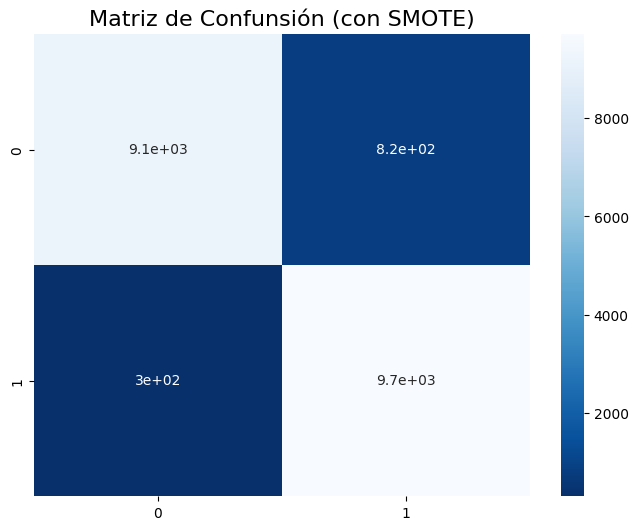

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test) ## Se usa el modelo anterior para predecir los datos de test

print(f'Accuracy = {accuracy_score(y_test, preds) :.2f}\nRecall = {recall_score(y_test, preds) :.2f}\n')

cm = confusion_matrix(y_test, preds) ## Matriz de confusión para comparar los resultados de la predicción
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confunsión (con SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap="Blues_r");



`Accuracy = 0.94`: La precisión del modelo ha aumentado al `94%`, lo que indica que el modelo predice correctamente el 94% de las instancias.

`Recall = 0.97`: La sensibilidad del modelo ha mejorado notablemente, alcanzando el `97%`, lo que significa que el modelo está identificando correctamente el `97%` de las instancias positivas.

_______________

***Interpretación***
Mejora en la Precisión: Un aumento en la precisión sugiere que el modelo está haciendo menos errores en general, tanto en la identificación de positivos como de negativos.
Mejora en la Sensibilidad: Un recall del 97% indica que el modelo es muy efectivo en la identificación de instancias positivas, lo cual es crucial en muchos contextos de aplicacion real

### ENTRENAMIENTO `DECISION TREE` CON NUEVOS DATOS SMOTE

In [100]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X=X_sm, y=y_sm)

DecisionTreeClassifier(max_depth=4)

>Recordar que estamos usando ahora `X_sm y y_sm`

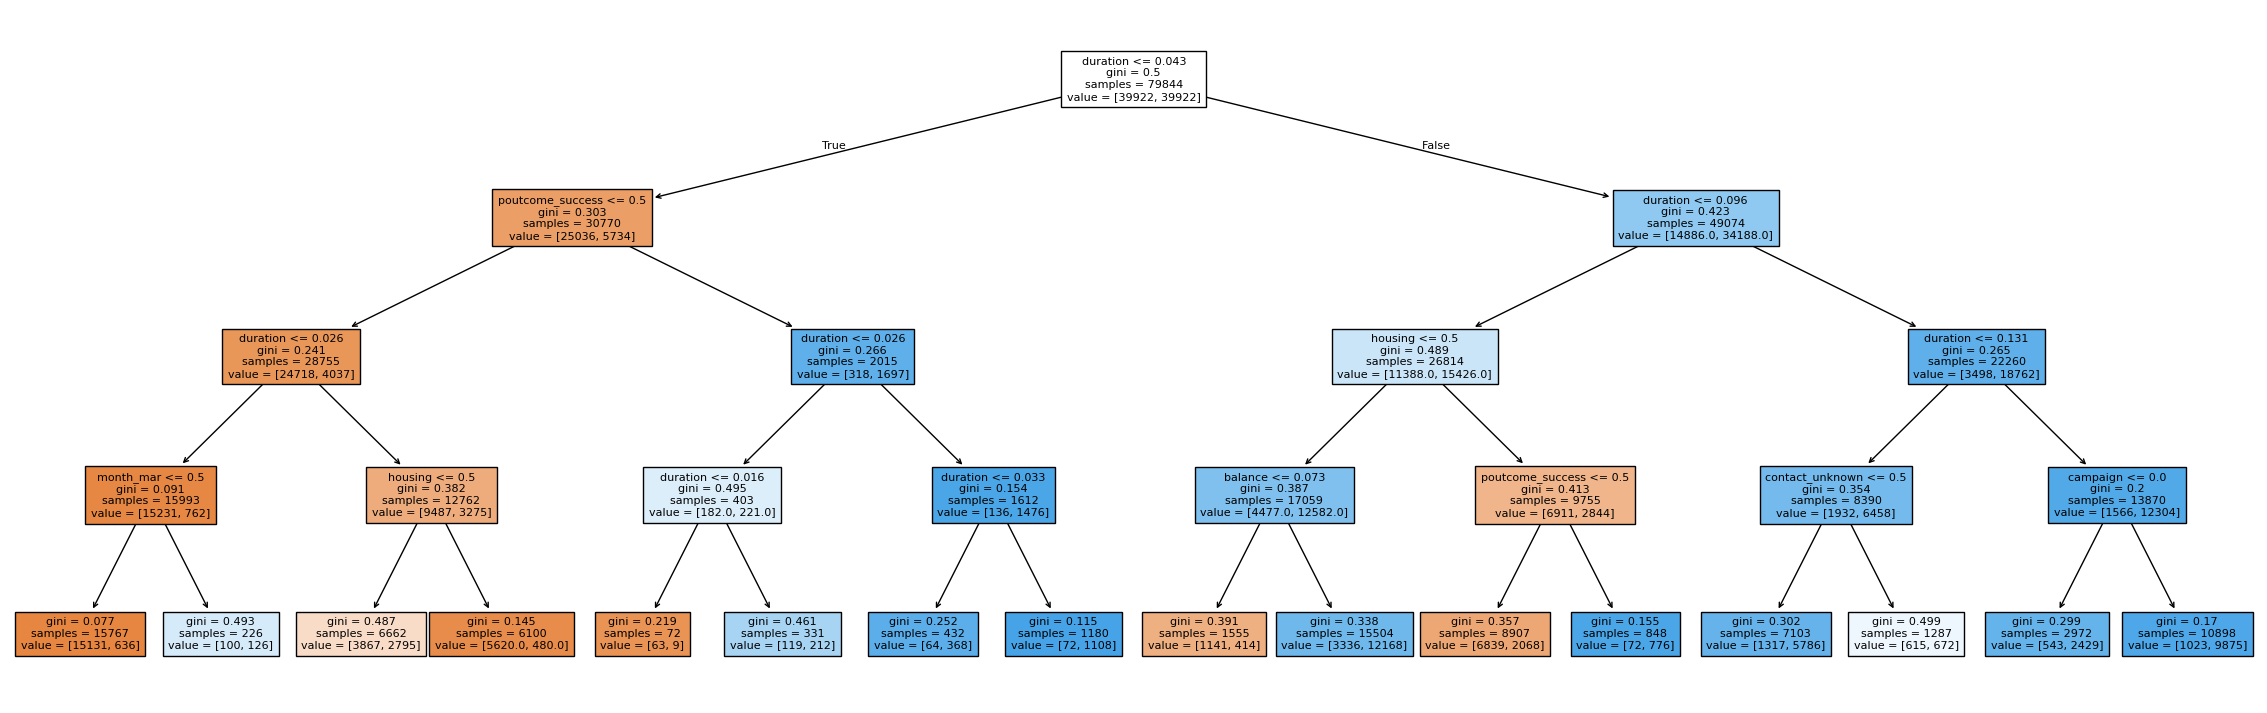

In [101]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(29, 9))
plot_tree(decision_tree=model, feature_names=X_sm.columns, filled=True, fontsize=8);

In [102]:
y_sm.value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

In [103]:
## Evaluacion de predidcion
y_sm_pred = model.predict(X_sm)
df_y_sm_pred = pd.DataFrame({
    'y_sm_pred': y_sm_pred
})

df_y_sm_pred['y_sm'] = y_sm
df_y_sm_pred

,y_sm_pred,y_sm
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
79839,1,1
79840,1,1
79841,1,1
79842,1,1


In [104]:
(df_y_sm_pred['y_sm'] == df_y_sm_pred['y_sm_pred']).mean()

0.828878813686689

In [105]:
len(df_y_sm_pred[ df_y_sm_pred['y_sm']!= df_y_sm_pred['y_sm_pred'] ]) ## en 4423 datos falla el algoitmo

13663